# Homework #2

* copy this file into your drive
```
File -> Save a copy in Drive
```
* write the code in the cells provided for each questions
* <font color="red"> DO NOT DELETE or MODIFY </font> the first line of each cell (will be used to mark your homework, otherwise you will get 0)
* <font color="red"> DO NOT DELETE or MODIFY </font> function name, function input, and function output (return). Otherwise, you will get 0.
* <font color="red"> DO NOT ADD </font> anything outside the function (of the homeworkx_x cells). Otherwise, you will get 0.
* Make sure homework2_1-2_3 can run properly and can be tested with any image (not rely just on your images); otherwise, your homework will not be marked.


In [35]:
!wget https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL  -O kitty55.png
!wget https://drive.google.com/uc?id=1_-_yN30miNhzR9ZC5DHTiljH6LVq4hZz  -O clean_cat.png
!wget https://drive.google.com/uc?id=1LEwFRI2vjSqQEd68lYwyuJ4JyJYPQX2m  -O blurry_noisy_cat.png
!wget https://drive.google.com/uc?id=1lnO_PK81O54bLBUprBlo8-2x9smWYDcP  -O moodeng.jpg

--2024-10-08 14:06:04--  https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.google.com (drive.google.com)... 108.177.11.102, 108.177.11.113, 108.177.11.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL [following]
--2024-10-08 14:06:04--  https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112875 (110K) [image/png]
Saving to: ‘kitty55.png’

kitty55.png         100%[===================>] 110.23K  --.-KB/s    in 0.003s  

2024-10-08 14:06:06 (37.1 MB/s) - ‘kitty55.png’ 

In [36]:
# homework2_1 --> do not modify/delete this first line and do not add anything before this line

# import library for 2.1
import cv2
import numpy as np
import matplotlib.pyplot as plt
# you can add more library here


def homework2_1(gray_image):
    # input -> gray_image - type -> np.ndarray, size of - (height, width) with dtype - uint8
    # output -> filtered_image - Filtered images (P_T > 99%) - type -> np.ndarray, size of - (height, width) with dtype - uint8


    # TO DO : Apply a Gaussian low pass filter with minimum cutoff frequency (C) maintaining the image power > 99%

    # Convert image to frequency domain
    dft = np.fft.fft2(gray_image)
    dft_shifted = np.fft.fftshift(dft)

    # Compute image power in frequency domain (PT_org)
    spectrum_power = np.abs(dft_shifted) ** 2
    PT_org = np.sum(spectrum_power)

    # Image dimensions
    M, N = gray_image.shape
    u = np.arange(-M//2, M//2)
    v = np.arange(-N//2, N//2)
    U, V = np.meshgrid(u, v)

    # Apply Gaussian filter with increasing cutoff frequency
    for C in range(1, min(M, N)//2):  # Try different cutoff frequencies
        # Gaussian low-pass filter
        gaussian_filter = np.exp(- (U**2 + V**2) / (2 * (C**2)))

        # Apply the filter to the frequency domain representation
        filtered_dft_shifted = dft_shifted * gaussian_filter

        # Compute the power of the filtered image (PT_f)
        filtered_spectrum_power = np.abs(filtered_dft_shifted) ** 2
        PT_f = np.sum(filtered_spectrum_power)

        # Calculate the percentage of the original power retained (alpha)
        alpha = (PT_f / PT_org) * 100

        # If power retained is more than 99%, stop
        if alpha > 99:
            break

    # Inverse Fourier Transform to convert back to spatial domain
    filtered_dft = np.fft.ifftshift(filtered_dft_shifted)
    filtered_image = np.fft.ifft2(filtered_dft)
    filtered_image = np.abs(filtered_image)

    # Normalize the image to uint8
    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Print cutoff frequency and alpha
    print(f"Cutoff frequency (C) = {C}")
    print(f"Alpha (percentage of image power retained) = {alpha:.2f}%")

    # Show the original image
    plt.figure(figsize=(12, 8))

    plt.subplot(231), plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image'), plt.axis('off')

    # Show the Fourier spectrum of the original image
    plt.subplot(232), plt.imshow(np.log(1 + np.abs(dft_shifted)), cmap='gray')
    plt.title('Fourier Spectrum (Original)'), plt.axis('off')

    # Show the Fourier spectrum of the filtered image
    plt.subplot(233), plt.imshow(np.log(1 + np.abs(filtered_dft_shifted)), cmap='gray')
    plt.title('Fourier Spectrum (Filtered)'), plt.axis('off')

    # Show the filtered image
    plt.subplot(234), plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image (PT > 99%)'), plt.axis('off')

    plt.show()

    return filtered_image




# Do not add anything outside the function in the submission

In [37]:
# homework2_2 --> do not modify/delete this first line and do not add anything before this line
# import library for 2.2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from scipy.signal import wiener


def estimate_noise(image):
    """Estimate the noise power in the image."""
    noise = np.std(image)
    return noise**2


def homework2_2(org_image, blur_image):
    # input -> org_image - a grayscale image with type -> np.ndarray, size of - (height, width) with dtype - uint8
    #       -> blur_image - a degraded image with type -> np.ndarray, size of - (height, width) with dtype - uint8
    # output -> restored_image - restored image (grayscale) using wiener filter - type -> np.ndarray, size of - (height, width) with dtype - uint8
    #         -> SSIM - compared image

    # Estimate noise power
    noise_power = estimate_noise(blur_image)

    # Apply Wiener filter with estimated noise
    restored_image = wiener(blur_image, (5, 5), noise_power)

    # Normalize the restored image to uint8
    restored_image = cv2.normalize(restored_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Compute SSIM between the restored image and the original clean image
    SSIM = ssim(org_image, restored_image)

    # Print SSIM
    print(f"Structural Similarity Index (SSIM) = {SSIM:.4f}")

    # Plot the original, degraded, and restored images
    plt.figure(figsize=(12, 8))

    plt.subplot(131), plt.imshow(org_image, cmap='gray')
    plt.title('Original Image'), plt.axis('off')

    plt.subplot(132), plt.imshow(blur_image, cmap='gray')
    plt.title('Blurred Noisy Image'), plt.axis('off')

    plt.subplot(133), plt.imshow(restored_image, cmap='gray')
    plt.title(f'Restored Image (SSIM = {SSIM:.4f})'), plt.axis('off')

    plt.show()

    return restored_image, SSIM



# Do not add anything outside the function in the submission

In [38]:
!pip install PyWavelets

In [63]:
# homework2_3 --> do not modify/delete this first line and do not add anything before this line
# import library for 2.3
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
# you can add more library here

def homework2_3(rgb_image):
    # input -> rgb_image - type -> np.ndarray, size of - (height, width, 3) with dtype - uint8
    # output -> half_blur_image - half blur image in Grayscale or RGB colors

    # Initialize lists to hold coefficients for each channel
    coeffs = { 'R': [], 'G': [], 'B': [] }

    # Perform multi-level wavelet decomposition for each channel
    for channel in range(3):  # Iterate through R, G, B channels
        color_channel = rgb_image[:, :, channel]
        coeffs_channel = []
        for level in range(3):
            if level == 0:
                coeffs_channel.append(pywt.dwt2(color_channel, wavelet='haar'))
            else:
                coeffs_channel.append(pywt.dwt2(coeffs_channel[-1][0], wavelet='haar'))
        coeffs['RGB'[channel]] = coeffs_channel

    # Create a figure to visualize the coefficients at each level
    fig, axs = plt.subplots(4, 4, figsize=(15, 10))
    fig.suptitle('Wavelet Decomposition', fontsize=16)

    # Extract and visualize coefficients for J-1, J-2, and J-3 for each channel
    for level in range(3):
        for color, coeffs_channel in coeffs.items():
            cA, (cH, cV, cD) = coeffs_channel[level]
            axs[level, 0].imshow(cA, cmap='gray')
            axs[level, 0].set_title(f"{color} Approximation J-{level+1}")
            axs[level, 1].imshow(cH, cmap='gray')
            axs[level, 1].set_title(f"{color} Horizontal Detail J-{level+1}")
            axs[level, 2].imshow(cV, cmap='gray')
            axs[level, 2].set_title(f"{color} Vertical Detail J-{level+1}")
            axs[level, 3].imshow(cD, cmap='gray')
            axs[level, 3].set_title(f"{color} Diagonal Detail J-{level+1}")

    # Hide any unused subplots
    for ax in axs.flat:
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # For level J-1, remove the right half of the three detail components
    cH1, cV1, cD1 = coeffs['R'][0][1]  # Get detail components of the R channel for J-1
    cH1[:, cH1.shape[1] // 2:] = 0  # Set right half of horizontal details to zero
    cV1[:, cV1.shape[1] // 2:] = 0  # Set right half of vertical details to zero
    cD1[:, cD1.shape[1] // 2:] = 0  # Set right half of diagonal details to zero

    # Reconstruct the image with modified coefficients for Level J-1 using the R channel
    coeffs_modified = (coeffs['R'][0][0], (cH1, cV1, cD1))
    half_blur_image_R = pywt.idwt2(coeffs_modified, wavelet='haar')

    # Repeat for G and B channels to create the final RGB image
    cH2, cV2, cD2 = coeffs['G'][0][1]
    cH2[:, cH2.shape[1] // 2:] = 0
    cV2[:, cV2.shape[1] // 2:] = 0
    cD2[:, cD2.shape[1] // 2:] = 0
    coeffs_modified_G = (coeffs['G'][0][0], (cH2, cV2, cD2))
    half_blur_image_G = pywt.idwt2(coeffs_modified_G, wavelet='haar')

    cH3, cV3, cD3 = coeffs['B'][0][1]
    cH3[:, cH3.shape[1] // 2:] = 0
    cV3[:, cV3.shape[1] // 2:] = 0
    cD3[:, cD3.shape[1] // 2:] = 0
    coeffs_modified_B = (coeffs['B'][0][0], (cH3, cV3, cD3))
    half_blur_image_B = pywt.idwt2(coeffs_modified_B, wavelet='haar')

    # Combine the blurred channels into a single image
    half_blur_image = np.stack((half_blur_image_R, half_blur_image_G, half_blur_image_B), axis=-1)

    # Ensure the output is in the valid range
    half_blur_image = np.clip(half_blur_image, 0, 255).astype(np.uint8)

    return half_blur_image

# Do not add anything outside the function in the submission


# Test our function here

Cutoff frequency (C) = 27
Alpha (percentage of image power retained) = 99.02%


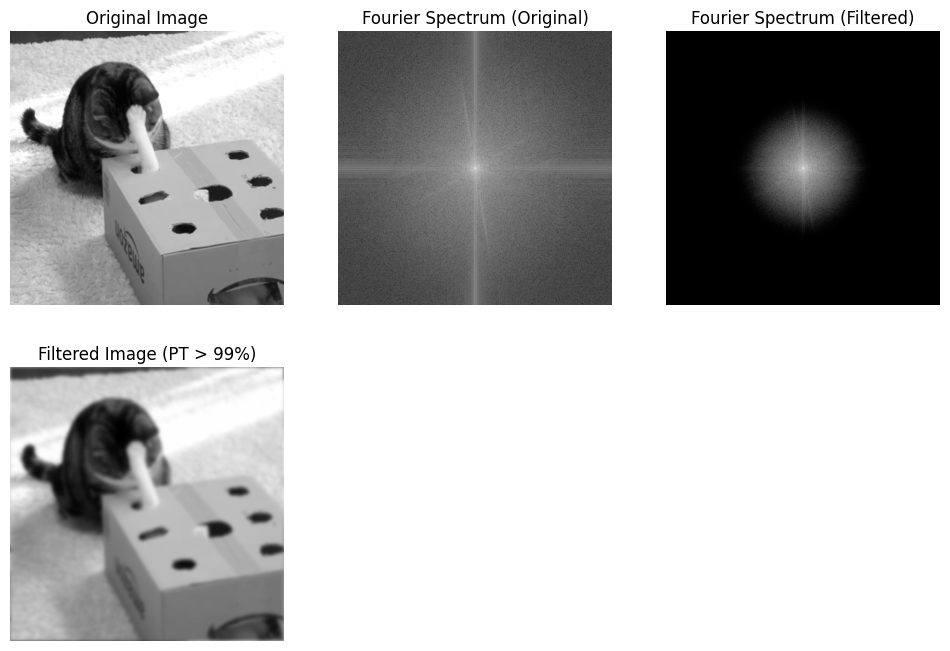

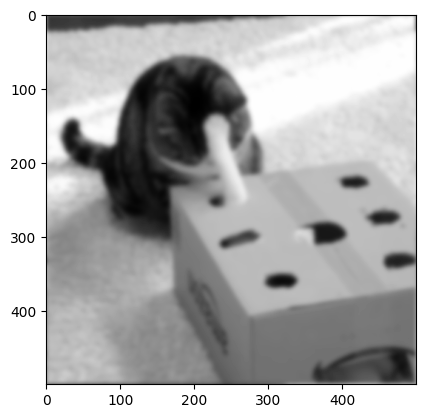

In [40]:
# test homework2_1
img = cv2.imread('kitty55.png',0)
out = homework2_1(img)
plt.imshow(out,cmap='gray')
plt.show()


Structural Similarity Index (SSIM) = 0.6375


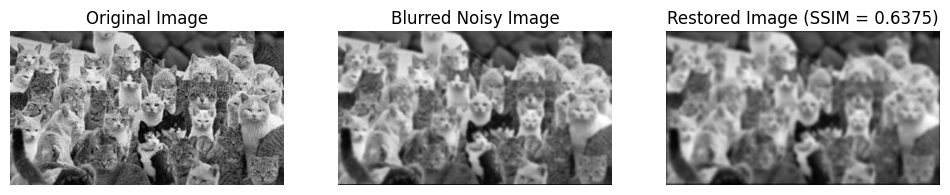

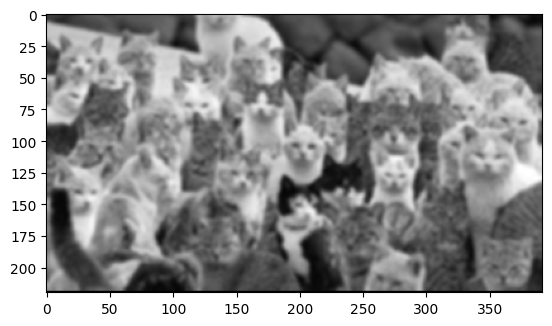

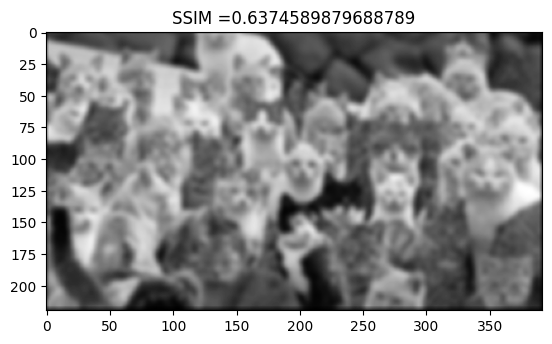

In [41]:
# test homework2_2
org_image = cv2.imread("clean_cat.png",0)
blur_image = cv2.imread("blurry_noisy_cat.png",0)
restored_image, SSIM = homework2_2(org_image,blur_image)
plt.imshow(blur_image,cmap='gray')
plt.show()
plt.imshow(restored_image,cmap='gray')
plt.title('SSIM ='+ str(SSIM))
plt.show()

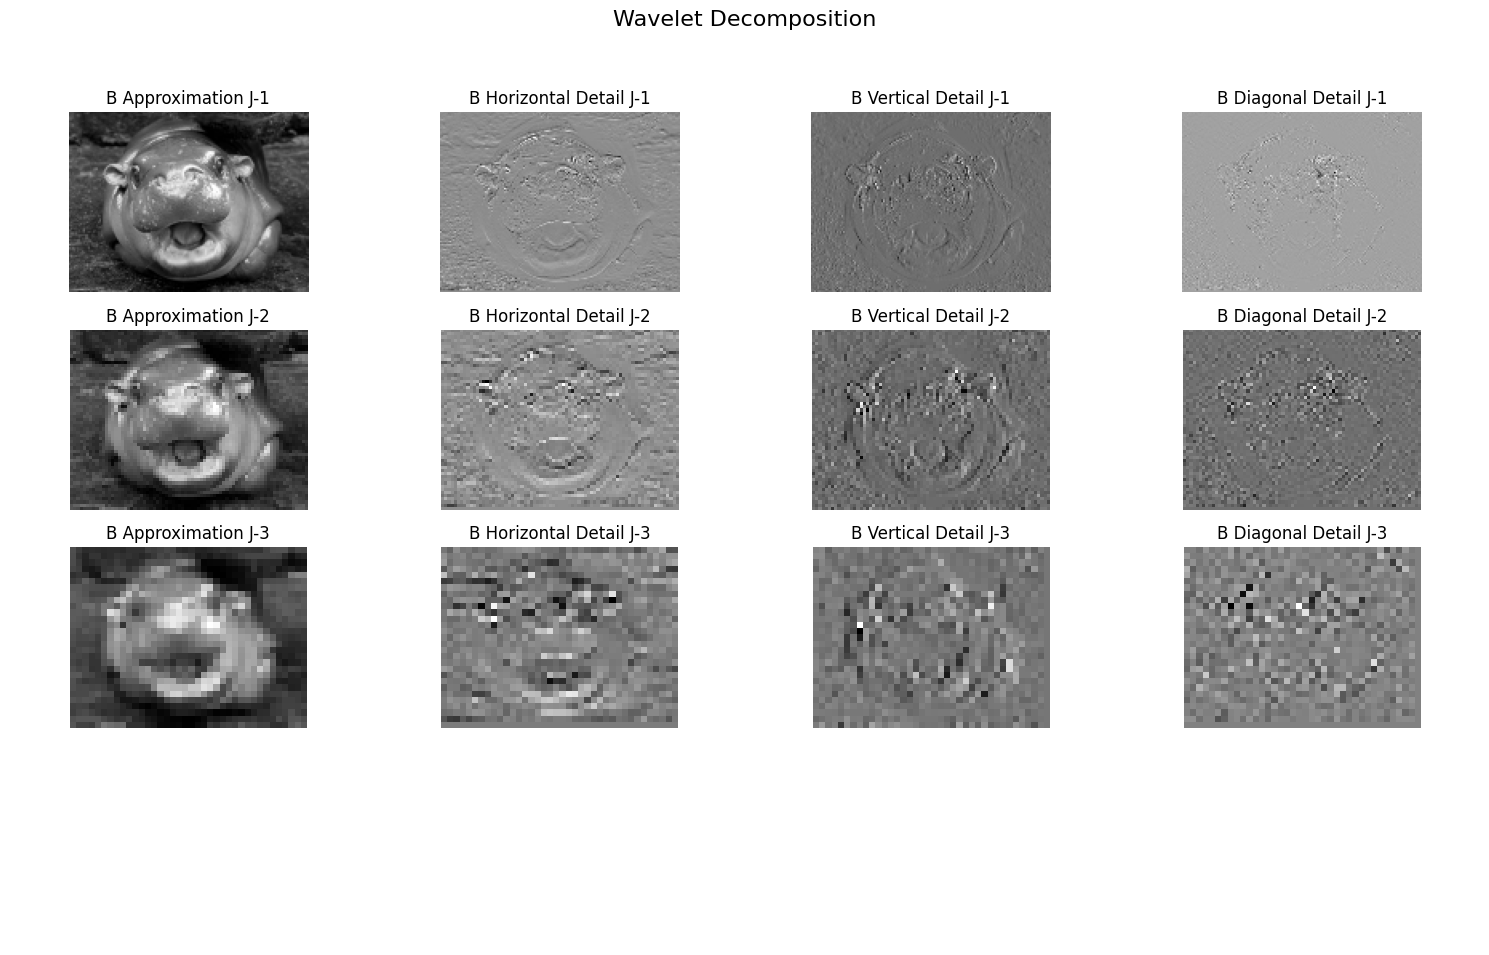

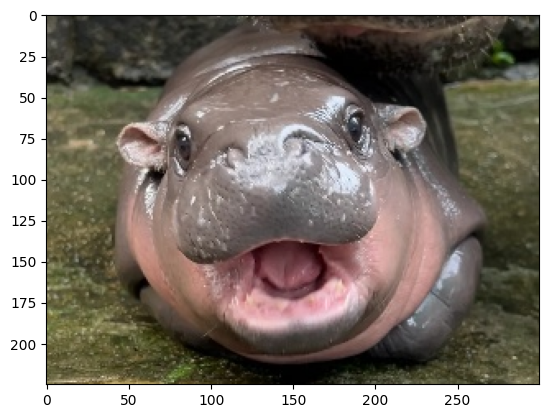

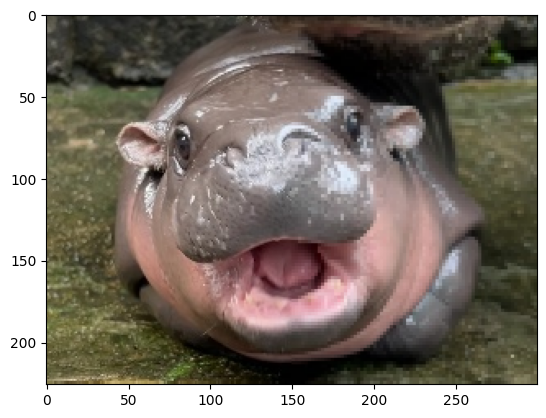

In [64]:
# test homework2_3
rgb = cv2.imread("moodeng.jpg")
blur_image = homework2_3(rgb[:,:,::-1])
plt.imshow(rgb[:,:,::-1])
plt.show()
plt.imshow(blur_image,cmap='gray')
plt.show()